In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Preliminary analysis: telegram

## FDB

In [2]:
df_fdb = pd.read_csv('../data/telegram/messaggi_telegram_fdb.csv')

/var/folders/r3/t2r07q612snc9xmhh7_6wkqm0000gn/T/ipykernel_99351/1859297291.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fdb = pd.read_csv('../data/telegram/messaggi_telegram_fdb.csv')


In [4]:
df_fdb = df_fdb.dropna(subset=['message'])
df_fdb.shape

(154711, 33)

In [5]:
df_fdb['date'] = pd.to_datetime(df_fdb['date'])

In [6]:
messages_per_day = df_fdb['date'].dt.date.value_counts()

<Axes: xlabel='date'>

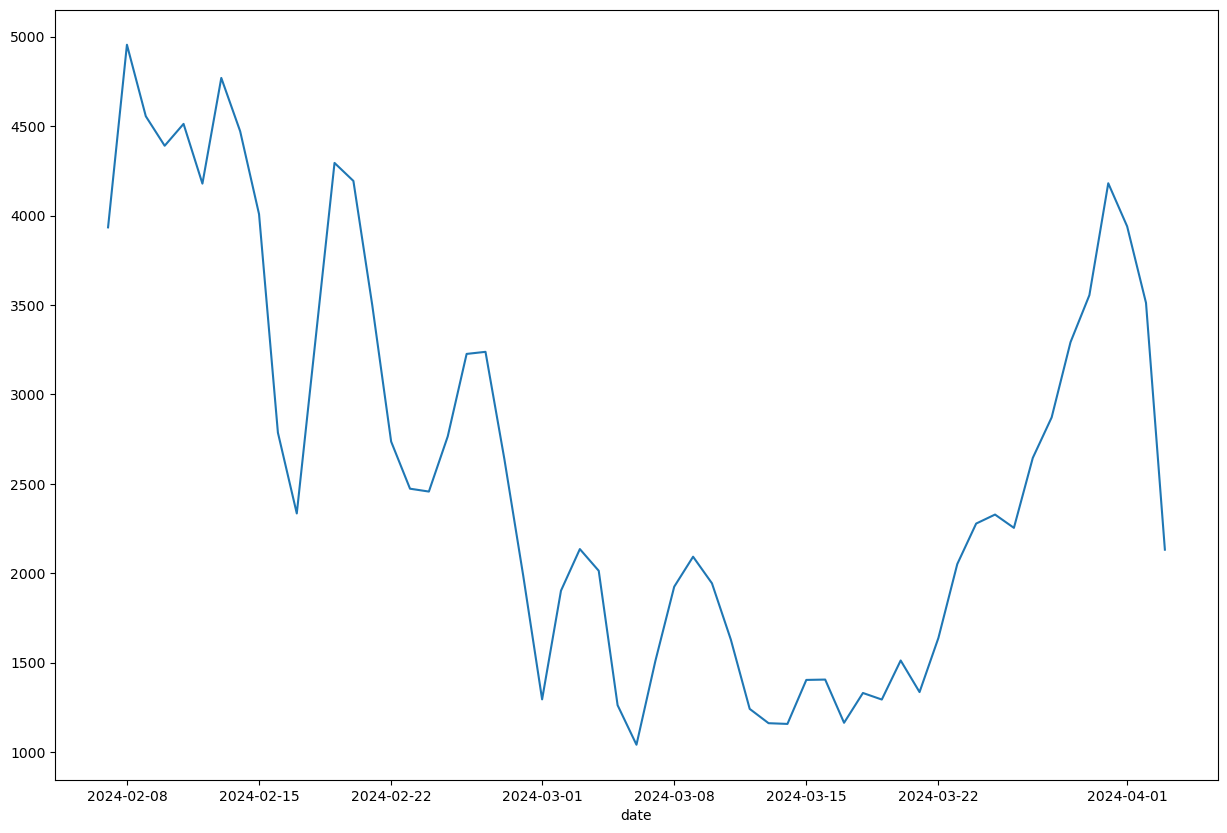

In [7]:
fig = plt.figure(figsize=[15,10])
messages_per_day.sort_index().rolling(window=3, center=True).mean().plot()

In [8]:
def count_words(serie):
    '''Function  that takes a Pandas Series of strings as input.
    Splits the strings and counts the words. 
    Returns a Series of int'''

    return serie.str.split(' ').apply(lambda x: len(x))

In [9]:
count_words(df_fdb['message']).mean()
#assez court

7.812708857159478

In [10]:
count_words(df_fdb['message']).describe()
#outliers to be cleaned

count    154711.000000
mean          7.812709
std          16.086949
min           1.000000
25%           3.000000
50%           5.000000
75%           8.000000
max         743.000000
Name: message, dtype: float64

## Azione Incel

In [12]:
df_az = pd.read_csv('../data/telegram/messaggi_telegram_azione_incel.csv')

/var/folders/r3/t2r07q612snc9xmhh7_6wkqm0000gn/T/ipykernel_99351/1148672799.py:1: DtypeWarning: Columns (4,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_az = pd.read_csv('../data/telegram/messaggi_telegram_azione_incel.csv')


In [13]:
df_az = df_az.dropna(subset=['message'])
df_az.shape

(35044, 33)

In [14]:
df_az['date'] = pd.to_datetime(df_az['date'])

In [15]:
messages_per_day = df_az['date'].dt.date.value_counts()

<Axes: xlabel='date'>

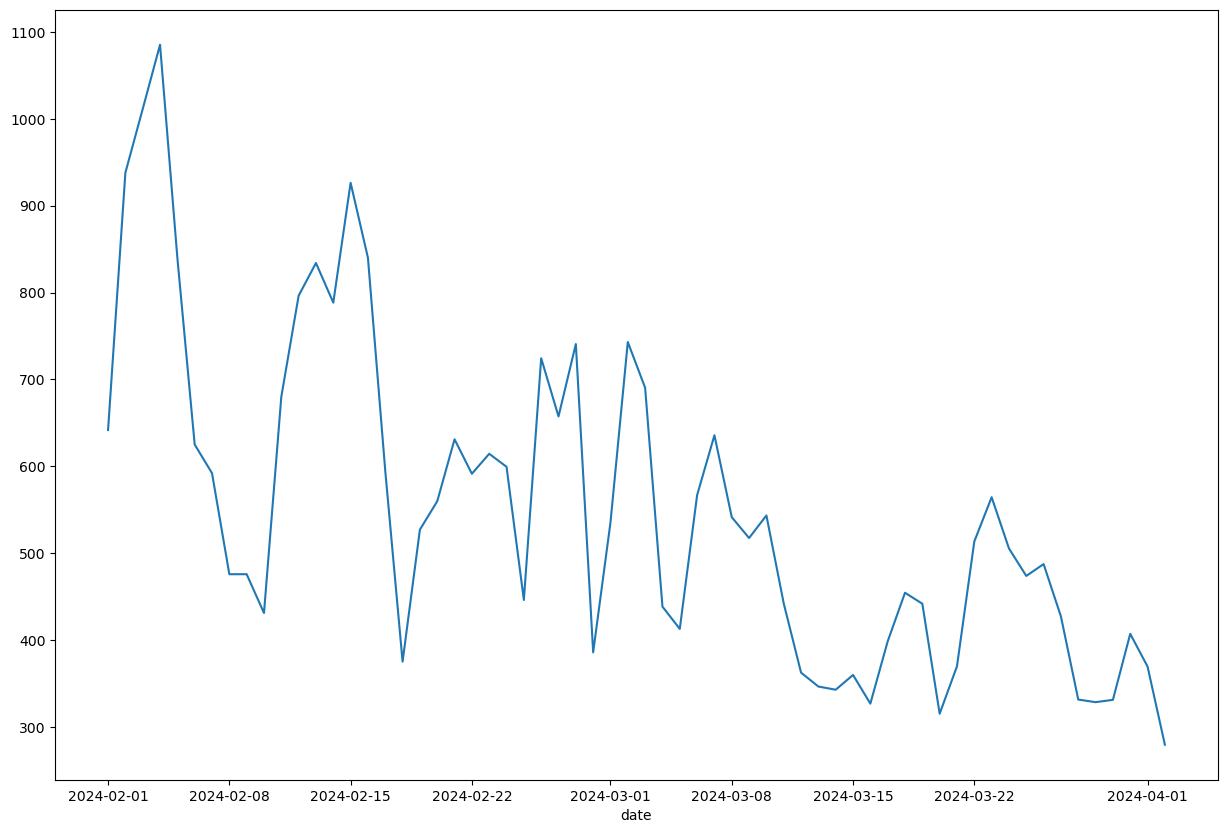

In [16]:
fig = plt.figure(figsize=[15,10])
messages_per_day.sort_index().rolling(window=3, center=True).mean().plot()

In [17]:
count_words(df_az['message']).mean()
#très proche de l'autre groupe

8.030618650838946

In [18]:
count_words(df_az['message']).describe()
#outliers to be cleaned

count    35044.000000
mean         8.030619
std         16.112560
min          1.000000
25%          3.000000
50%          5.000000
75%          9.000000
max        712.000000
Name: message, dtype: float64

# Preliminary analysis: forum

In [20]:
df_forum = pd.read_csv('../data/forum_scrape/fdb_scraped_pulito.csv')

In [21]:
df_forum = df_forum.dropna(subset=['Testo'])
df_forum.shape

(94792, 4)

In [22]:
df_forum['Data'] = pd.to_datetime(df_forum['Data'],utc=True)

In [23]:
post_per_day =  df_forum['Data'].dt.date.value_counts()

<Axes: xlabel='Data'>

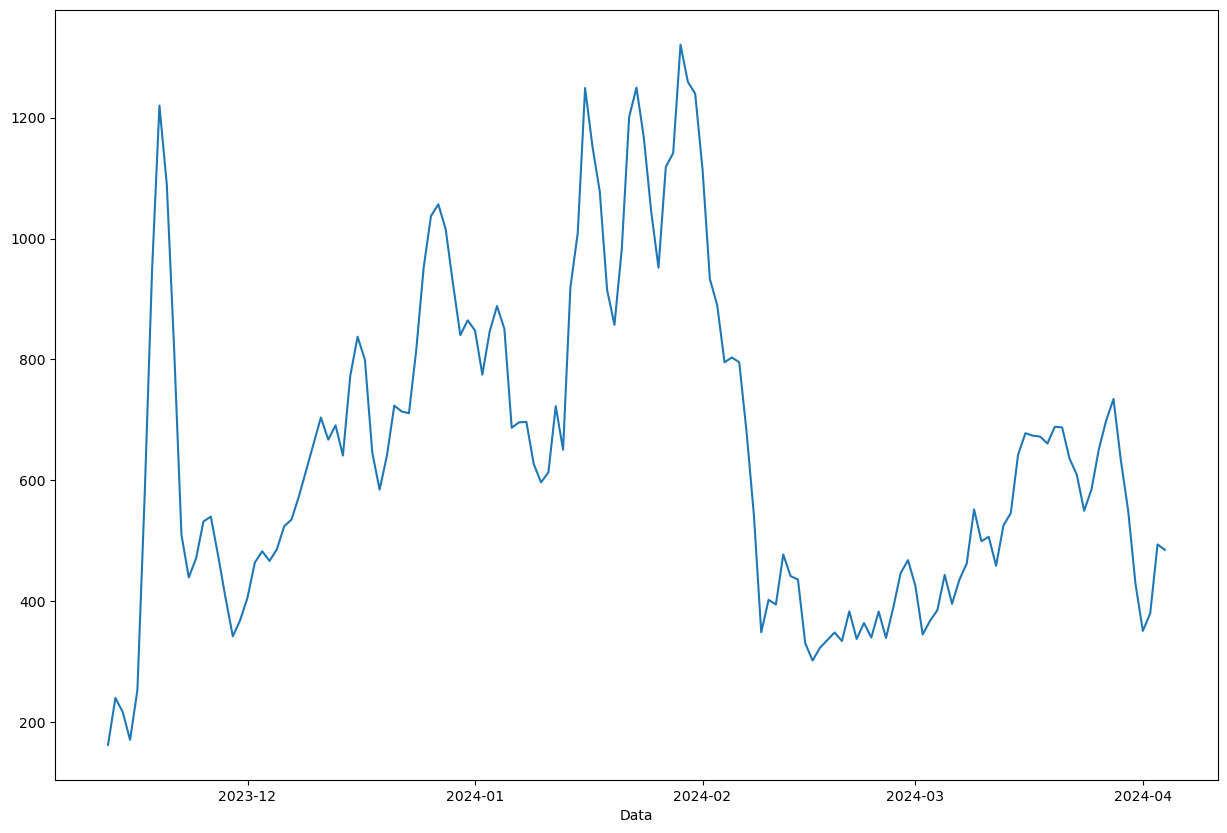

In [24]:
fig = plt.figure(figsize=[15,10])
post_per_day.sort_index().rolling(window=3,center=True).mean().plot()
#low average, greater timespan

In [25]:
count_words(df_forum['Testo']).mean()
#beaucoup plus haut que les message sur Telegram

34.49459870031226

In [26]:
count_words(df_forum['Testo']).describe()
#there are outliers to be cleaned

count    94792.000000
mean        34.494599
std         51.892937
min          1.000000
25%          8.000000
50%         18.000000
75%         39.000000
max       1629.000000
Name: Testo, dtype: float64